# Getting the data       /Sena İrem Toka 090190361

#### I could not get the data in jupyter notebook so I used Google Colab and I also could not get the data as a whole, it caused my colab session to crash everytime. So I got the data in 6 parts and then I merged them in jupyter notebook into one json file. I gave the rollcall range as 600. I checked some roll calls and most of them had less than 600. Some of them had more but iterating 1000 times took too much time and mostly it was iterating for nothing. Getting the data in 6 parts and merging them took me 2.5 hours in total but prior to that I tried to make it work in jupyter notebook several times and each of those attempts took 2-3 hours. 

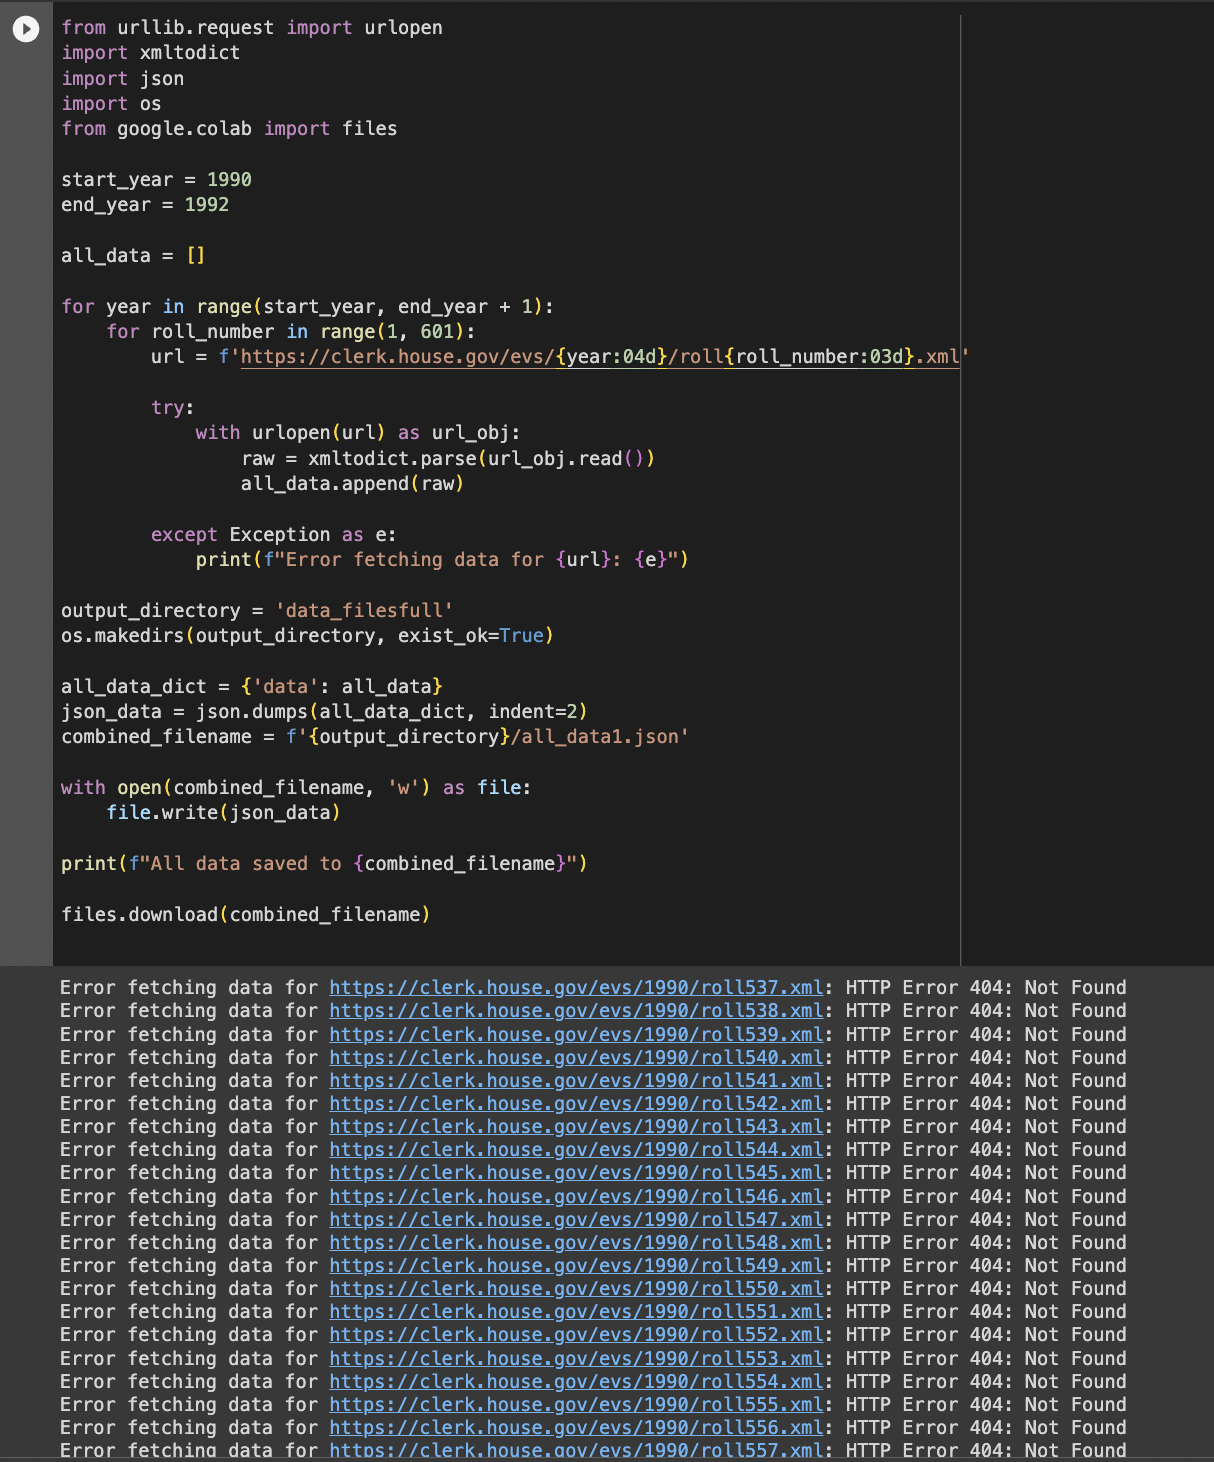

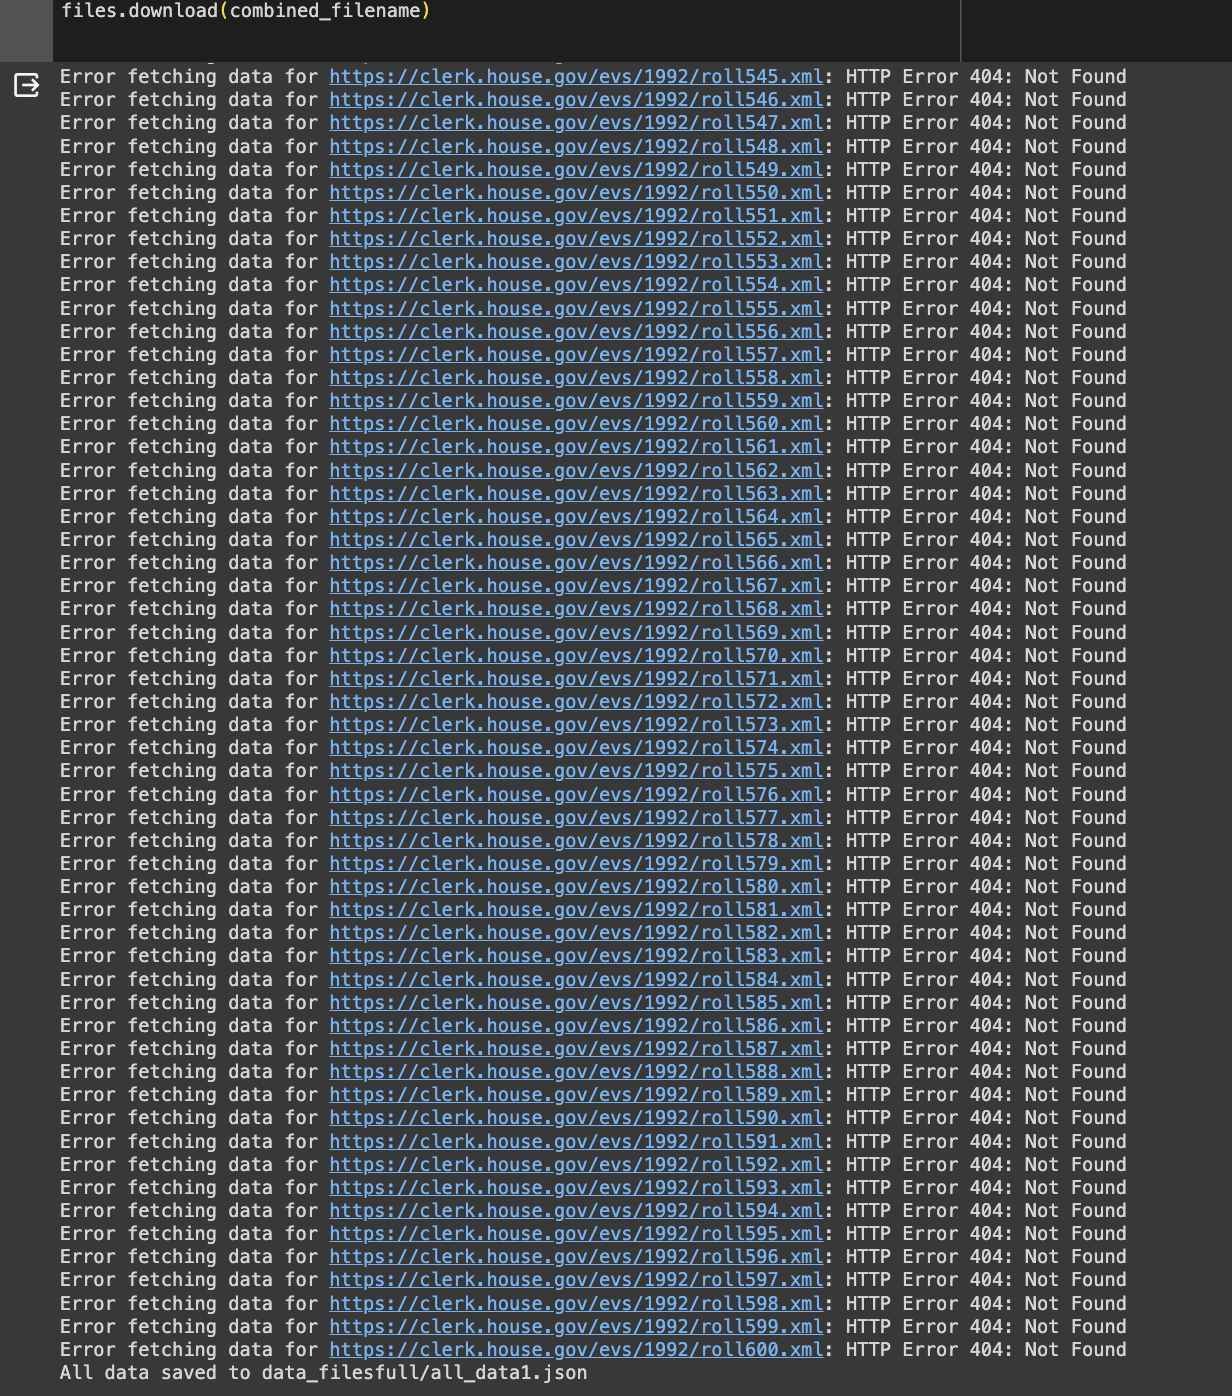

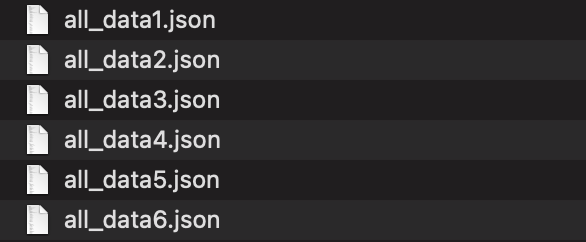

I merged the 6 chunks of data that I got in colab into one json file

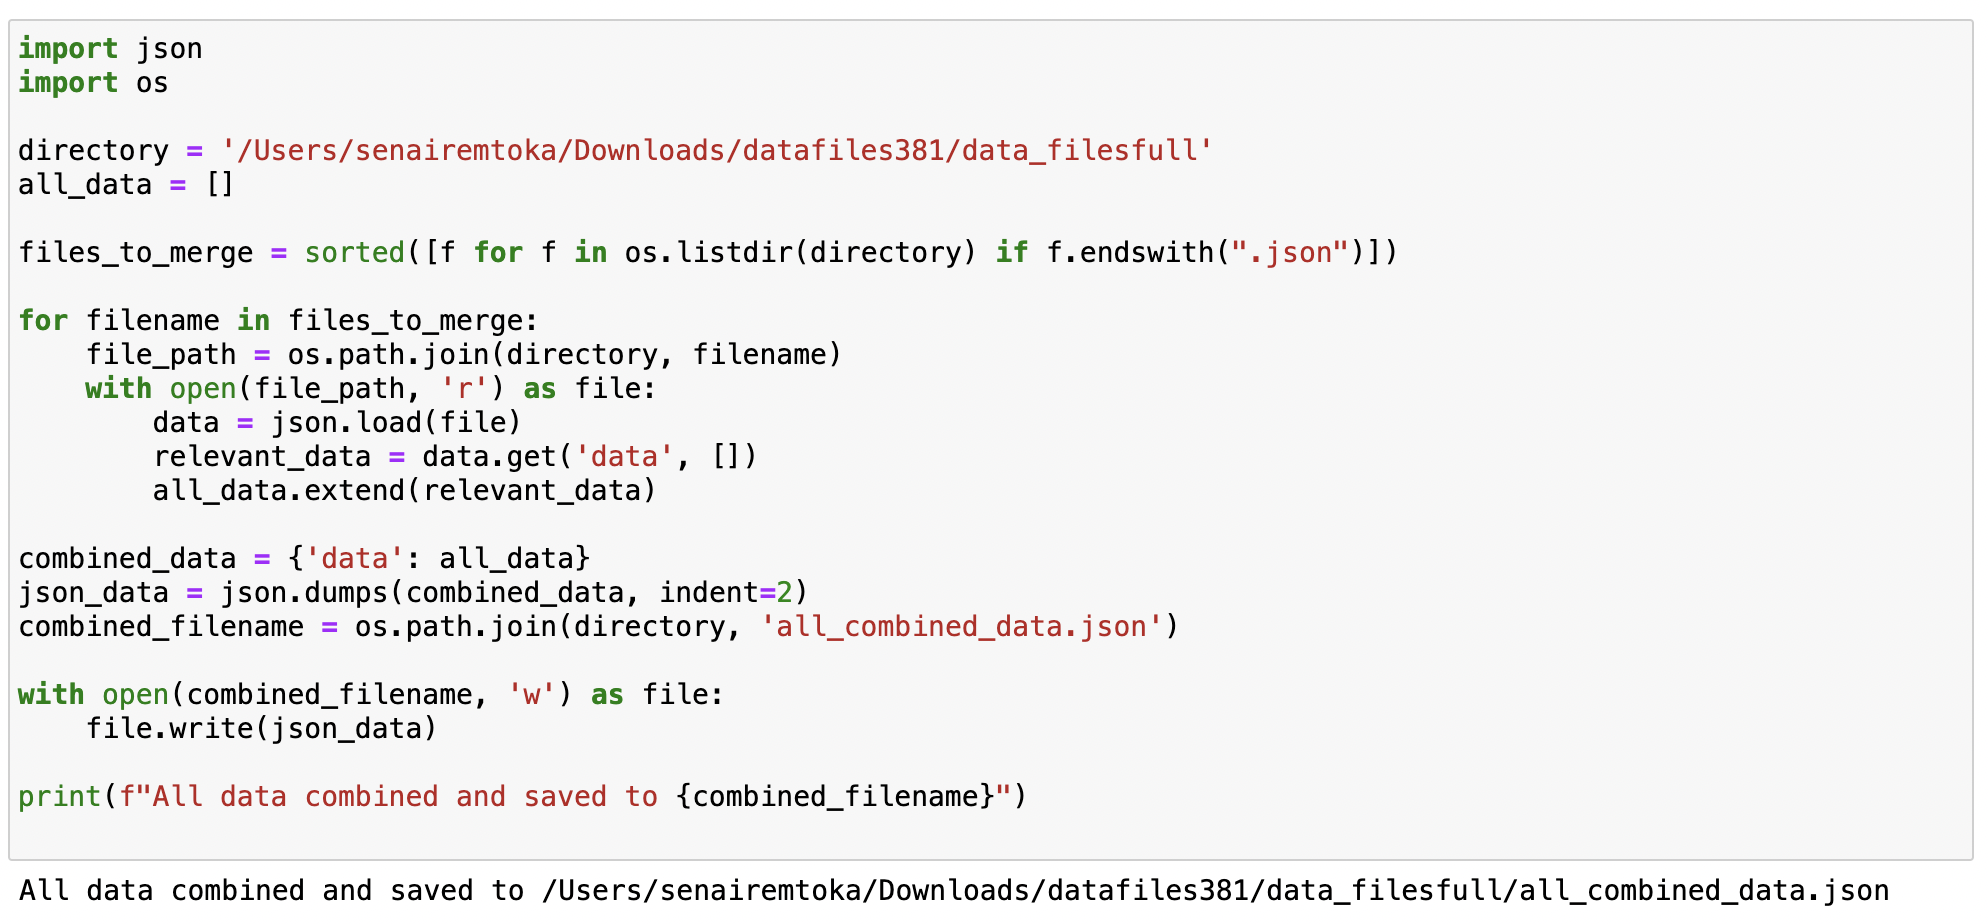

In [122]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

json_file_path = '/Users/senairemtoka/Downloads/datafiles381/data_filesfull/all_combined_data.json'

with open(json_file_path, 'r') as file:
    data = json.load(file)



I got the entire data into jupyter. 

The first question was related to accessing the data dictionary so I had to examine the structure of the dictionary to make the right calls.

As I wrote above I only got 600 roll calls from each year. Most of the years have less than 600 but some have more so the answers are mostly right but there might be some differences. 

# Question 1

To find the legislators in each year who was absent the most we iterate though every vote type which is'QUORUM' in each roll call. We take the year information from the roll call that we're in and if the vote is Not Voting we count that as absent. We keep the year, legislator and state in a dictionary. 

In [117]:
absent_counts_by_year = defaultdict(lambda: defaultdict(int))

for roll_call in data['data']:
    year = int(roll_call['rollcall-vote']['vote-metadata']['action-date'].split('-')[2])

    if roll_call['rollcall-vote']['vote-metadata']['vote-type'] == 'QUORUM':
        for recorded_vote in roll_call['rollcall-vote']['vote-data']['recorded-vote']:
            legislator = recorded_vote['legislator']['#text']
            state = recorded_vote['legislator']['@state']
            vote = recorded_vote['vote']

            if vote == 'Not Voting':
                absent_counts_by_year[year][(legislator, state)] += 1

for year, absent_counts in absent_counts_by_year.items():
    max_absent_legislator, max_absent_state = max(absent_counts, key=absent_counts.get)
    max_absent_count = absent_counts[max_absent_legislator, max_absent_state]
    
    print(f"For the year {year}, the legislator {max_absent_legislator} from {max_absent_state} was absent the most with {max_absent_count} absences.")

For the year 1990, the legislator Frank (MA) from MA was absent the most with 22 absences.
For the year 1991, the legislator Frank (MA) from MA was absent the most with 15 absences.
For the year 1992, the legislator Frank (MA) from MA was absent the most with 14 absences.
For the year 1993, the legislator Frank (MA) from MA was absent the most with 16 absences.
For the year 1994, the legislator Frank (MA) from MA was absent the most with 10 absences.
For the year 1995, the legislator Frank (MA) from MA was absent the most with 13 absences.
For the year 1996, the legislator Abercrombie from HI was absent the most with 1 absences.
For the year 1997, the legislator Frank (MA) from MA was absent the most with 6 absences.
For the year 1998, the legislator Frank (MA) from MA was absent the most with 14 absences.
For the year 1999, the legislator Stark from CA was absent the most with 2 absences.
For the year 2000, the legislator Gekas from PA was absent the most with 3 absences.
For the year

To find how many legislators there are for each year and state, we create a dictionary to hold the information we are about to obtain. We iterate thorough every roll call and get year, I also had to add a check if the vote data and recorded data exists, because for some instances it doesn't and it was giving an error. Once we are iterating inside the roll calls we get the legislator and the state from the recorded votes. 

In [118]:
legislator_count_by_year_state = defaultdict(lambda: defaultdict(set))

for roll_call in data.get('data', []):
    action_date = roll_call.get('rollcall-vote', {}).get('vote-metadata', {}).get('action-date')
    if action_date:
        year = int(action_date.split('-')[2])

        vote_data = roll_call.get('rollcall-vote', {}).get('vote-data', {})
        if not isinstance(vote_data, dict):
            continue
        recorded_votes = vote_data.get('recorded-vote', [])
        if not isinstance(recorded_votes, list):
            continue

        for recorded_vote in recorded_votes:
            legislator = recorded_vote.get('legislator', {}).get('#text')
            state = recorded_vote.get('legislator', {}).get('@state')

            if legislator and state:
                legislator_count_by_year_state[year][state].add(legislator)

for year, state_counts in legislator_count_by_year_state.items():
    for state, legislators in state_counts.items():
        num_legislators = len(legislators)
        print(f"For the year {year} and state {state}, there are {num_legislators} legislators.")

For the year 1990 and state NY, there are 34 legislators.
For the year 1990 and state HI, there are 3 legislators.
For the year 1990 and state AR, there are 4 legislators.
For the year 1990 and state CA, there are 45 legislators.
For the year 1990 and state TX, there are 27 legislators.
For the year 1990 and state IL, there are 22 legislators.
For the year 1990 and state OH, there are 21 legislators.
For the year 1990 and state WI, there are 9 legislators.
For the year 1990 and state MA, there are 11 legislators.
For the year 1990 and state OR, there are 5 legislators.
For the year 1990 and state LA, there are 8 legislators.
For the year 1990 and state NC, there are 11 legislators.
For the year 1990 and state GA, there are 10 legislators.
For the year 1990 and state VA, there are 10 legislators.
For the year 1990 and state FL, there are 19 legislators.
For the year 1990 and state MD, there are 8 legislators.
For the year 1990 and state NE, there are 3 legislators.
For the year 1990 and

We do the same accessing operation as above but I still wrote it again in a different cell block. We create a dictionary to hold the vote counts and do the whole iterating through each roll call process and check if legislator and state keys exist. We iterate through each recorded vote and get the legislator and their state & party affiliation. If they voted we count it as voted and if they did not vote count it as not voting. We get all these information in the dictionary we created and then we turn it into the dataframe by creating lists and appending each related information to its list then creating the dataframe from the lists.

In [132]:
legislator_vote_counts = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: {'party': None, 'total_votes': 0, 'not_voting': 0})))

for roll_call in data.get('data', []):
    action_date = roll_call.get('rollcall-vote', {}).get('vote-metadata', {}).get('action-date')
    if action_date:
        year = int(action_date.split('-')[2])

        vote_data = roll_call.get('rollcall-vote', {}).get('vote-data', {})
        if not isinstance(vote_data, dict):
            continue

        recorded_votes = vote_data.get('recorded-vote', [])
        if not isinstance(recorded_votes, list):
            continue

        for recorded_vote in recorded_votes:
            legislator_name = recorded_vote.get('legislator', {}).get('#text')
            state = recorded_vote.get('legislator', {}).get('@state')
            party_affiliation = recorded_vote.get('legislator', {}).get('@party')
            vote = recorded_vote.get('vote')

            if legislator_name and state and party_affiliation:
                legislator_data = legislator_vote_counts[year][state][legislator_name]
                legislator_data['party'] = party_affiliation
                legislator_data['total_votes'] += 1

                if vote == 'Not Voting':
                    legislator_data['not_voting'] += 1

year_list = []
state_list = []
legislator_list = []
party_list = []
votes_list = []
not_voting_list = []

for year, state_data in legislator_vote_counts.items():
    for state, legislator_data in state_data.items():
        for legislator, data1 in legislator_data.items():
            year_list.append(year)
            state_list.append(state)
            legislator_list.append(legislator)
            party_list.append(data1['party'])
            votes_list.append(data1['total_votes'])
            not_voting_list.append(data1['not_voting'])

df = pd.DataFrame({
    'Year': year_list,
    'State': state_list,
    'Legislator': legislator_list,
    'Party': party_list,
    'Total Votes': votes_list,
    'Not Voting': not_voting_list
})

df

Year State      Legislator Party  Total Votes  Not Voting
0      1990    NY        Ackerman     D          536          42
1      1990    NY        Boehlert     R          536           6
2      1990    NY          Downey     D          536          13
3      1990    NY           Engel     D          536          72
4      1990    NY            Fish     R          536          38
...     ...   ...             ...   ...          ...         ...
14956  2023    XX          Norton     D          320           0
14957  2023    XX        Plaskett     D          320          38
14958  2023    XX       Radewagen     R          320         163
14959  2023    XX          Sablan     D          320          87
14960  2023    XX  González-Colón     R          264          21

[14961 rows x 6 columns]

To find the longest serving legislator I counted who has the most appearances and it turned out that Bilirakis has 34 years of service with 34 appearances. 

In [133]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

df_filtered = df.dropna(subset=['Year'])
legislator_counts = df_filtered.groupby('Legislator')['Year'].count().reset_index(name='Appearance Count')
longest_serving_legislator = legislator_counts.loc[legislator_counts['Appearance Count'].idxmax()]

print(f"The longest-serving legislator in the US House of Representatives is: {longest_serving_legislator['Legislator']} "
      f"with {longest_serving_legislator['Appearance Count']} appearances.")

The longest-serving legislator in the US House of Representatives is: Bilirakis with 34 appearances.


# Question 2

When I checked some recent data I saw there was Aye and No used in some roll calls. So I counted Aye as Yea and No as Nay. I tried this code on the roll calls that I saw had Aye and No and it worked so I applied it on the whole data. After I turn them into the correct vote type I count them into roll_call_info. 

With this code I got the Yeas and Nays as dictionaries turned into lists containing each party vote counts. Also the dataframe contains the action-date. 

In [134]:
roll_call_list = []

for record in data['data']:
    action_date = record['rollcall-vote']['vote-metadata']['action-date']

    if 'rollcall-vote' in record and record['rollcall-vote'].get('vote-data') is not None:
        recorded_votes = record['rollcall-vote']['vote-data'].get('recorded-vote', [])
        roll_call_info = {'Date': action_date, 'YEAs': {}, 'NAYs': {}}

        for vote in recorded_votes:
            party = vote['legislator']['@party']
            vote_type = vote['vote']

            if vote_type.lower() == 'aye':
                vote_type = 'Yea'
            elif vote_type.lower() == 'no':
                vote_type = 'Nay'

            if vote_type == 'Yea':
                roll_call_info['YEAs'][party] = roll_call_info['YEAs'].get(party, 0) + 1
            elif vote_type == 'Nay':
                roll_call_info['NAYs'][party] = roll_call_info['NAYs'].get(party, 0) + 1

        roll_call_list.append(roll_call_info)

roll_call_df = pd.DataFrame(roll_call_list)

roll_call_df


Date                  YEAs                 NAYs
0      23-Jan-1990                    {}                   {}
1      24-Jan-1990   {'D': 234, 'R': 78}    {'R': 87, 'D': 2}
2      24-Jan-1990            {'R': 137}  {'D': 244, 'R': 32}
3      24-Jan-1990  {'D': 245, 'R': 145}            {'R': 25}
4      31-Jan-1990   {'D': 226, 'R': 75}    {'R': 94, 'D': 6}
...            ...                   ...                  ...
19364   3-Nov-2023            {'D': 201}           {'R': 215}
19365   3-Nov-2023    {'R': 212, 'D': 1}   {'D': 200, 'R': 3}
19366   3-Nov-2023  {'D': 133, 'R': 209}    {'D': 68, 'R': 1}
19367   6-Nov-2023  {'D': 184, 'R': 200}             {'R': 1}
19368   6-Nov-2023  {'D': 184, 'R': 175}            {'R': 24}

[19369 rows x 3 columns]

Since I got the Yeas and Nays in each party together, I needed to separate them according to their parties and drop the independent party votes as we don't need them. I got them separated and filled the empty values as 0. This process actually took a bit longer than i though because first I thought I was supposed to merge the columns of yeas and nays but I figured out I just had to concat them together.

In [124]:
dfs = []

for index, row in roll_call_df.iterrows():
    date = row['Date']
    
    yeas_dict = row['YEAs']
    nays_dict = row['NAYs']
    
    yeas_df = pd.DataFrame(yeas_dict, index=[date])
    nays_df = pd.DataFrame(nays_dict, index=[date])
    
    yeas_df = yeas_df.drop(columns=['I'], errors='ignore')
    nays_df = nays_df.drop(columns=['I'], errors='ignore')
    
    yeas_df = yeas_df.fillna(0)
    nays_df = nays_df.fillna(0)
    
    dfs.append(pd.concat([yeas_df.add_prefix('YEAS_'), nays_df.add_prefix('NAYS_')], axis=1))

result_df = pd.concat(dfs)
result_df = result_df.fillna(0).astype(int)

result_df

YEAS_D  YEAS_R  NAYS_R  NAYS_D
23-Jan-1990       0       0       0       0
24-Jan-1990     234      78      87       2
24-Jan-1990       0     137      32     244
24-Jan-1990     245     145      25       0
31-Jan-1990     226      75      94       6
...             ...     ...     ...     ...
3-Nov-2023      201       0     215       0
3-Nov-2023        1     212       3     200
3-Nov-2023      133     209       1      68
6-Nov-2023      184     200       1       0
6-Nov-2023      184     175      24       0

[19369 rows x 4 columns]

To find the polarization I take the values from each row which is the equivalent of each roll call and I apply the polarization formula. There were timeout errors when there was division by zero so I check that before the calculation so I set the polarization to zero when the denominator is zero. Then I create a dataframe with the dates and the polarization of that date. 

In [125]:
polarization_dfs = []

for index, row in result_df.iterrows():
    date = index

    yeas_democrats = row['YEAS_D']
    yeas_republicans = row['YEAS_R']
    nays_democrats = row['NAYS_D']
    nays_republicans = row['NAYS_R']

    total_votes_democrats = yeas_democrats + nays_democrats
    total_votes_republicans = yeas_republicans + nays_republicans

    if total_votes_democrats + total_votes_republicans != 0:
        polarization = (abs(yeas_democrats - yeas_republicans) + abs(nays_democrats - nays_republicans)) / (total_votes_democrats + total_votes_republicans)
    else:
        polarization = 0  

    polarization_dict = {
        'Date': date,
        'Polarization': polarization
    }
    polarization_dfs.append(pd.DataFrame([polarization_dict]))

polarization_result_df = pd.concat(polarization_dfs, ignore_index=True)

polarization_result_df

Date  Polarization
0      23-Jan-1990      0.000000
1      24-Jan-1990      0.600998
2      24-Jan-1990      0.845036
3      24-Jan-1990      0.301205
4      31-Jan-1990      0.596010
...            ...           ...
19364   3-Nov-2023      1.000000
19365   3-Nov-2023      0.980769
19366   3-Nov-2023      0.347932
19367   6-Nov-2023      0.044156
19368   6-Nov-2023      0.086162

[19369 rows x 2 columns]

We turn the Date from the dataframe to datetime to use it on the chronological order of the graph. This is a very tight plot but I think the polarization increased. Between 2000 and 2012 there are many values which are smaller than 0.2 and in 2012 the polarization was very intense. I think since 2020 the polarization is much more than before.

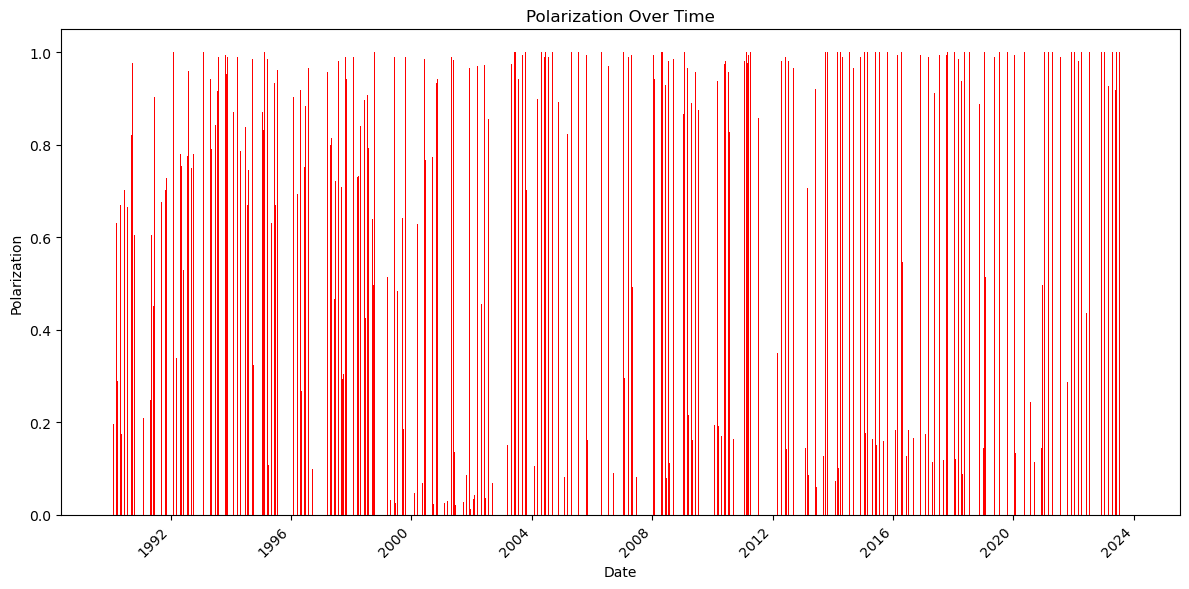

In [126]:
import matplotlib.pyplot as plt

polarization_result_df['Date'] = pd.to_datetime(polarization_result_df['Date'])

plt.figure(figsize=(12, 6))
plt.bar(polarization_result_df['Date'], polarization_result_df['Polarization'], color='red')
plt.title('Polarization Over Time')
plt.xlabel('Date')
plt.ylabel('Polarization')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


# Question 3

Iterating through the original data dictionary, getting the year information. then we check if the rollcall-vote and vote data values exist, and if the recorded vote exists, we get the legislator name, their vote and their affiliated party. we also update the count of the number of votes for each year in every iteration. 

To find out the number of times each legislator voted in total, we iterate through each roll call and get each legislators name, vote type and party and create a dataframe with the number times they voted each year. 

In [127]:
votes_dict = {}
for record in data['data']:
    action_date = record['rollcall-vote']['vote-metadata']['action-date']
    year = pd.to_datetime(action_date).year

    if 'rollcall-vote' in record and record['rollcall-vote'].get('vote-data') is not None:
        recorded_votes = record['rollcall-vote']['vote-data'].get('recorded-vote', [])

        for vote in recorded_votes:
            legislator = vote['legislator']['#text'] 
            vote_type = vote['vote']
            party = vote['legislator']['@party']

            votes_dict.setdefault(year, {}).setdefault(legislator, 0)
            votes_dict[year][legislator] += 1
            
totalvotes_df = pd.DataFrame.from_dict(votes_dict, orient='index').fillna(0).astype(int)
totalvotes_df


Ackerman  Akaka  Alexander  Anderson  Andrews (TX)  Annunzio  Anthony  \
1990       536    108        536       536           536       536      536   
1991       444      0        444       444           444       444      444   
1992       488      0        488       488           488       488      488   
1993       600      0          0         0           600         0        0   
1994       507      0          0         0           507         0        0   
1995       600      0          0         0             0         0        0   
1996       455      0          0         0             0         0        0   
1997       600      0          0         0             0         0        0   
1998       547      0          0         0             0         0        0   
1999       600      0          0         0             0         0        0   
2000       600      0          0         0             0         0        0   
2001       512      0          0         0             0         0        0   
2002       484      0          0         0             0         0        0   
2003       600      0        600         0             0         0        0   
2004       544      0        544         0             0         0        0   
2005       600      0        600         0             0         0        0   
2006       543      0        543         0             0         0        0   
2007       600      0        600         0             0         0        0   
2008       600      0        600         0             0         0        0   
2009       600      0        600         0             0         0        0   
2010       600      0        600         0             0         0        0   
2011       599      0        599         0             0         0        0   
2012      1198      0       1198         0             0         0        0   
2013         0      0        490         0             0         0        0   
2014         0      0          0         0             0         0        0   
2015         0      0          0         0             0         0        0   
2016         0      0          0         0             0         0        0   
2017         0      0          0         0             0         0        0   
2018         0      0          0         0             0         0        0   
2019         0      0          0         0             0         0        0   
2020         0      0          0         0             0         0        0   
2021         0      0          0         0             0         0        0   
2022         0      0          0         0             0         0        0   
2023         0      0          0         0             0         0        0   

      Applegate  Archer  Armey  ...  Sykes  Thanedar  Tokuda  Van Orden  \
1990        536     536    536  ...      0         0       0          0   
1991        444     444    444  ...      0         0       0          0   
1992        488     488    488  ...      0         0       0          0   
1993        600     600    600  ...      0         0       0          0   
1994        507     507    507  ...      0         0       0          0   
1995          0     600    600  ...      0         0       0          0   
1996          0     455    455  ...      0         0       0          0   
1997          0     600    600  ...      0         0       0          0   
1998          0     547    547  ...      0         0       0          0   
1999          0     600    600  ...      0         0       0          0   
2000          0     600    600  ...      0         0       0          0   
2001          0       0    512  ...      0         0       0          0   
2002          0       0    484  ...      0         0       0          0   
2003          0       0      0  ...      0         0       0          0   
2004          0       0      0  ...      0         0       0          0   
2005          0       0      0  ...     

I tried to do this with the result_df that I got before to calculate the polarization but I couldn't manage to do so. Therefore I just accessed the roll call's vote totals that gives like a summary of the result of the vote. It gives the total of votes for each party. So I look at the legislator's party and see what their party voted in majority. If it's the same they stayed in party lines and I add 1 to the count, if it's not the same they brok party lines so I add 1 to that count.  

I also only took the vote-type 'YEA-AND-NAY' because the other vote-types were not distinguishable like aye and no was just 'recorded-vote' and in some cases this is not even aye and no votes. So I couldn't figure out how to do that after trying many times. 

I took these outputs with a grain of salt because there are many cases where a legislator voted against the party lines more than they voted in the party lines. However when I look at the dictionary there are many cases where the yea and nay votes are relatively close and maybe that legislators are consistently against what their party votes in majority? 

In [128]:
votes_dict = {}

for record in data['data']:
    action_date = record['rollcall-vote']['vote-metadata']['action-date']
    year = pd.to_datetime(action_date).year

    if 'rollcall-vote' in record and record['rollcall-vote'].get('vote-data') is not None and record['rollcall-vote']['vote-metadata']['vote-type'] == 'YEA-AND-NAY':
        recorded_votes = record['rollcall-vote']['vote-data'].get('recorded-vote', [])

        if 'vote-totals' in record['rollcall-vote']:
            party_totals = record['rollcall-vote']['vote-totals']
        else:
            party_totals = {'totals-by-party': []}

        for vote in recorded_votes:
            legislator = vote['legislator']['#text']
            vote_type = vote['vote']
            party = vote['legislator']['@party']

            party_totals_for_party = next((item for item in party_totals['totals-by-party'] if item['party'] == party), None)
            if party_totals_for_party is not None:
                yea_total = int(party_totals_for_party['yea-total'])
                nay_total = int(party_totals_for_party['nay-total'])
            else:
                yea_total = 0
                nay_total = 0

            majority_vote = 'Yea' if yea_total > nay_total else 'Nay'

            votes_dict.setdefault(year, {}).setdefault(legislator, {'along_party_lines': 0, 'broke_party_lines': 0})

            if vote_type == majority_vote:
                votes_dict[year][legislator]['along_party_lines'] += 1
            else:
                votes_dict[year][legislator]['broke_party_lines'] += 1

for year, legislators in votes_dict.items():
    for legislator, votes in legislators.items():
        print(f"Year: {year}, Legislator: {legislator}, Voted along party lines: {votes['along_party_lines']}, Broke party lines: {votes['broke_party_lines']}")


Year: 1990, Legislator: Ackerman, Voted along party lines: 15, Broke party lines: 184
Year: 1990, Legislator: Akaka, Voted along party lines: 3, Broke party lines: 35
Year: 1990, Legislator: Alexander, Voted along party lines: 24, Broke party lines: 175
Year: 1990, Legislator: Anderson, Voted along party lines: 20, Broke party lines: 179
Year: 1990, Legislator: Andrews (TX), Voted along party lines: 28, Broke party lines: 171
Year: 1990, Legislator: Annunzio, Voted along party lines: 23, Broke party lines: 176
Year: 1990, Legislator: Anthony, Voted along party lines: 24, Broke party lines: 175
Year: 1990, Legislator: Applegate, Voted along party lines: 43, Broke party lines: 156
Year: 1990, Legislator: Archer, Voted along party lines: 103, Broke party lines: 96
Year: 1990, Legislator: Armey, Voted along party lines: 150, Broke party lines: 49
Year: 1990, Legislator: Aspin, Voted along party lines: 19, Broke party lines: 180
Year: 1990, Legislator: Atkins, Voted along party lines: 20, B

I already had the votes_dict from above so I just arrange the columns and add them into a list to create the dataframe. 

In [129]:
data_list = []

for year, legislators in votes_dict.items():
    for legislator, votes in legislators.items():
        data_list.append([year, legislator, votes['along_party_lines'], votes['broke_party_lines']])

votes_df = pd.DataFrame(data_list, columns=['Year', 'Legislator', 'Along_Party_Lines', 'Broke_Party_Lines'])

votes_df

Year       Legislator  Along_Party_Lines  Broke_Party_Lines
0      1990         Ackerman                 15                184
1      1990            Akaka                  3                 35
2      1990        Alexander                 24                175
3      1990         Anderson                 20                179
4      1990     Andrews (TX)                 28                171
...     ...              ...                ...                ...
14895  2023            Yakym                 40                115
14896  2023            Zinke                 41                114
14897  2023   Green, Al (TX)                 85                 40
14898  2023        McClellan                 73                 36
14899  2023  Franklin, Scott                  4                 10

[14900 rows x 4 columns]

To find the legislators that never broke the party line I also use the votes_dict that I got before, I look at every party's legislators and their votes. I already had the number of times everybody broke the party lines, so at any year and roll call if it's zero I take it as a count.

In [130]:
never_broke_party_line_count = {}
never_broke_party_line_legislators = {}

for year, legislators in votes_dict.items():
    never_broke_party_line_count.setdefault(year, {'D': 0, 'R': 0, 'I': 0})
    never_broke_party_line_legislators.setdefault(year, {'D': [], 'R': [], 'I': []})

    for legislator, votes in legislators.items():
        if votes['broke_party_lines'] == 0:
            party = vote['legislator']['@party']
            never_broke_party_line_count[year][party] += 1
            never_broke_party_line_legislators[year][party].append(legislator)

print("\nLegislators that never broke the party line:")
for year, party_counts in never_broke_party_line_count.items():
    if any(party_counts.values()):
        print(f"Year: {year}, Democrats: {party_counts['D']}, Republicans: {party_counts['R']}, Independents: {party_counts['I']}")
        print("Legislators:", never_broke_party_line_legislators[year])



Legislators that never broke the party line:
Year: 1994, Democrats: 0, Republicans: 1, Independents: 0
Legislators: {'D': [], 'R': ['Largent'], 'I': []}
Year: 1998, Democrats: 0, Republicans: 1, Independents: 0
Legislators: {'D': [], 'R': ['Meek  (FL)'], 'I': []}
Year: 2010, Democrats: 0, Republicans: 2, Independents: 0
Legislators: {'D': [], 'R': ['Stutzman', 'Reed'], 'I': []}


To find the 5 legislators that broke the party line most; I use the votes_dict that I got again, I look at every party's legislators and sort them it sorts from least to most, so I get the most 5 by reversing. Then I just print the legislator from each year. 

In [131]:
top_broke_party_line_legislators = {}
for year, legislators in votes_dict.items():
    top_broke_party_line_legislators.setdefault(year, [])

    sorted_legislators = sorted(legislators.items(), key=lambda x: x[1]['broke_party_lines'], reverse=True)[:5]
    top_broke_party_line_legislators[year].extend(sorted_legislators)

print("\nTop 5 Legislators that broke the party line the most:")
for year, top_legislators in top_broke_party_line_legislators.items():
    print(f"\nYear: {year}")
    for legislator, votes in top_legislators:
        party = vote['legislator']['@party']
        print(f"Legislator: {legislator}, Party: {party}, Broke party lines: {votes['broke_party_lines']}")



Top 5 Legislators that broke the party line the most:

Year: 1990
Legislator: Nelson, Party: R, Broke party lines: 190
Legislator: Morrison (CT), Party: R, Broke party lines: 188
Legislator: Dwyer, Party: R, Broke party lines: 187
Legislator: Hall (OH), Party: R, Broke party lines: 187
Legislator: Engel, Party: R, Broke party lines: 186

Year: 1991
Legislator: Frost, Party: R, Broke party lines: 179
Legislator: Brooks, Party: R, Broke party lines: 177
Legislator: Bustamante, Party: R, Broke party lines: 177
Legislator: Mrazek, Party: R, Broke party lines: 177
Legislator: Borski, Party: R, Broke party lines: 176

Year: 1992
Legislator: Ford, Party: R, Broke party lines: 204
Legislator: Levine (CA), Party: R, Broke party lines: 203
Legislator: Boxer, Party: R, Broke party lines: 200
Legislator: Dymally, Party: R, Broke party lines: 199
Legislator: Hatcher, Party: R, Broke party lines: 199

Year: 1993
Legislator: Ford, Party: R, Broke party lines: 197
Legislator: Bilbray, Party: R, Broke

For question 4 I got what we were supposed to do for this question but I just didn't have enough time to spend for this question to find what machine learning algorithm we should use and how.

In [136]:
for record in data['data']:
    question = record['rollcall-vote']['vote-metadata']['vote-question']
    result = record['rollcall-vote']['vote-metadata']['vote-result']
